# Phenotype Correction

In this tutorial we will learn:

 * What is a phenotype correction.
 
 * How to use it in a *dcgpy.expression_double*.
 
In a Cartesian Genetic Program the chromosome $X$ encodes some expression $g(x)$ which is the phenotype. There may be cases where one wants, instead, to encode some predefined expression containing $g(x)$ as the only evolvable part. For example one may want the phenotype to be $\alpha + \exp{g(x)}$. In this case, the original phenotype $g(x)$ represented by the cartesian program  needs to be corrected and we talk about a *phenotype correction*.

This technique, coupled with well assembled corrections, was introduced in genetic programming by researchers at the European Space Agency and allows to search in functional spaces that are much closer to the data allowing physical insight to be easily injected into the genetic search. 

In [1]:
# Some necessary imports.
from dcgpy import expression_double as expression
from dcgpy import kernel_set_double as kernel_set
from time import time
import pyaudi
import numpy as np
# Sympy is nice to have for basic symbolic manipulation.
from sympy import init_printing
from sympy.parsing.sympy_parser import *
init_printing()
# Fundamental for plotting.
from matplotlib import pyplot as plt
%matplotlib inline

### 1 - We define an expression
We define a mathmatical expression (encoded in the underlying Cartesian Genetic Program) with one input and one output and no ephemeral constants. The kernel functions are the basic ones and an arity of 2 is used.

In [2]:
ex = expression(
        inputs=1,
        outputs=1,
        rows=1,
        cols=16,
        levels_back=6,
        arity=2,
        kernels=kernel_set(["sum", "mul", "pdiv"])(),
        n_eph=3,
        seed=422)

In [3]:
# Let us have a look at the expression
print(ex(["x"]))

['(((x+c2)/(c1/(x+c2)))*(((c1/(x+c2))*(c1/(x+c2)))/(((c1/(x+c2))*(c1/(x+c2)))/(x/(x+c2)))))']


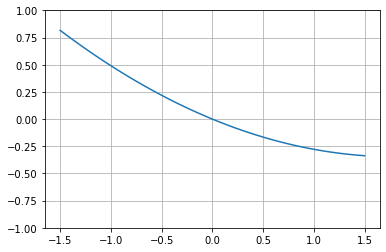

In [4]:
# And plot it
y = np.zeros(100)
x = np.linspace(-1.5,1.5,100)
for i,it in enumerate(x):
    y[i] = ex([it])[0]
plt.plot(x,y)
plt.ylim([-1,1])
plt.grid("on")

### 2 - We correct the phenotype
Say that we want, instead, to encode something in the form $f(x) = g(x) -\frac 12 (g(-1)+g(1)) + \frac 12 x (g(-1)-g(1))$. So that we make sure the function actually passes through the points (-1,0) and (1,0).


In [5]:
def pc_fun(x, g):
    alpha = - 0.5 * (g([-1])[0]+g([1])[0])
    beta = 0.5 * (g([-1])[0]-g([1])[0])
    return [g(x)[0]+alpha+x[0]*beta]

In [6]:
ex.set_phenotype_correction(pc_fun)

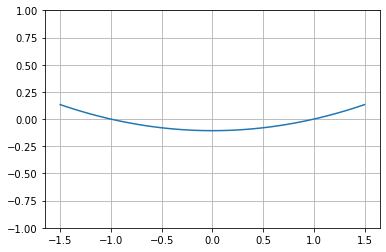

In [7]:
# And plot it
y = np.zeros(100)
x = np.linspace(-1.5,1.5,100)
for i,it in enumerate(x):
    y[i] = ex([it])[0]
plt.plot(x,y)
plt.ylim([-1,1])
plt.grid("on")

### 3 - We mutate 10 times and plot the mutated expressions
We perform some mutation and plot the resulting mutants as to show how all of them are expressing a corrected phenotype (i.e. they pass through the selected points)

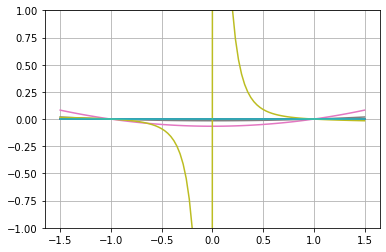

In [8]:
for loop in range(10):
    ex.mutate_random(20)
    for i,it in enumerate(x):
        y[i] = ex([it])[0]
    plt.plot(x,y)
plt.ylim([-1,1])
plt.grid("on")